In [26]:
import numpy as np
import scipy as sp
import math as m
import IPython

from scipy import signal as sp
from scipy.io import wavfile
from scipy.io.wavfile import write
from scipy.fft import fft, ifft

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

%matplotlib inline

plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 8})

Problem-1

In [27]:
alpha = 1 + 251%4
alpha

4

Text(0.5, 0, 't')

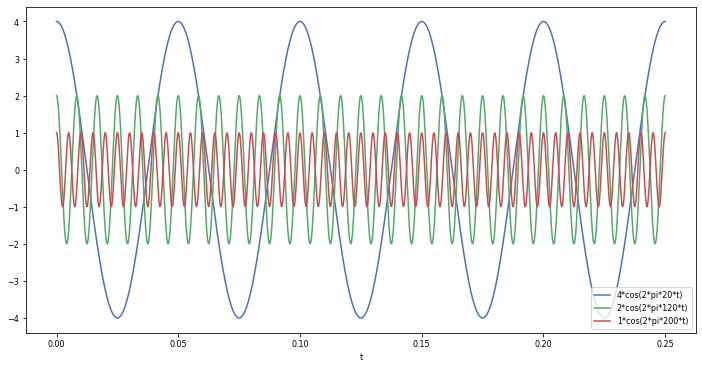

In [28]:
# a)Cosine function with amplitude alpha and frequency 5*alpha Hz.
# b)Cosine function with amplitude alpha/2 and frequency 6*alpha Hz.
# c)Cosine function with amplitude alpha/4 and frequency 10*alpha Hz.
t = np.linspace(0,1/alpha,1000)
ya= alpha*np.cos(2*np.pi*5*alpha*t)
yb= (alpha/2)*np.cos(2*np.pi*5*(6*alpha)*t)
yc= (alpha/4)*np.cos(2*np.pi*5*(10*alpha)*t)
plt.plot(t,ya)
plt.plot(t,yb)
plt.plot(t,yc)
plt.legend(["4*cos(2*pi*20*t)", "2*cos(2*pi*120*t)","1*cos(2*pi*200*t)"],loc ="lower right")
plt.xlabel("t")

Text(0, 0.5, 'ysum')

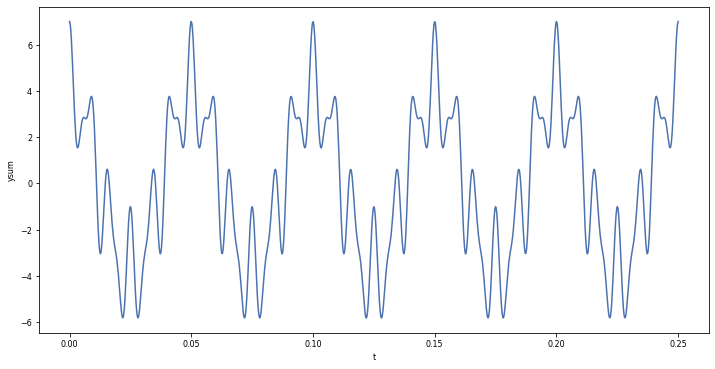

In [29]:
ysum=ya+yb+yc
plt.plot(t,ysum)
plt.xlabel("t")
plt.ylabel("ysum")

C:\Users\sujan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'ysum at sampling rate = 14*alpha')

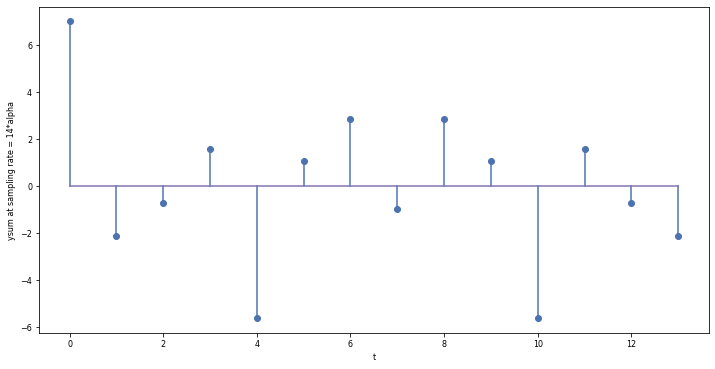

In [30]:
# (a) Fs = 14*alpha samples/second.
# (b) At the Nyquist rate of the signal.
# (c) At a sampling rate such that 6*alpha Hz is aliased to 3*alpha Hz.
Fs1=14*alpha
t1=np.arange(0,1/alpha,1/Fs1)
ya1= alpha*np.cos(2*np.pi*5*alpha*t1)
yb1= (alpha/2)*np.cos(2*np.pi*5*(6*alpha)*t1)
yc1= (alpha/4)*np.cos(2*np.pi*5*(10*alpha)*t1)
ysum1=ya1+yb1+yc1
plt.stem(ysum1)
plt.xlabel("t")
plt.ylabel("ysum at sampling rate = 14*alpha")

C:\Users\sujan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'ysum at sampling rate = 2*Fs')

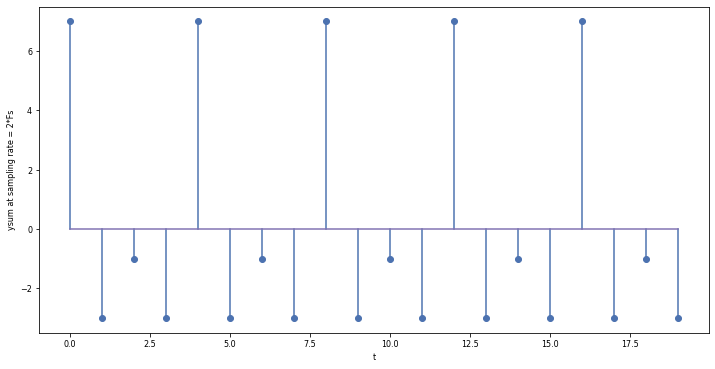

In [31]:
# Nyquist rate = 2*max(alpha,6*alpha,10*alpha)
Fs2=2*10*alpha
t2=np.arange(0,1/alpha,1/Fs2)
ya2= alpha*np.cos(2*np.pi*5*alpha*t2)
yb2= (alpha/2)*np.cos(2*np.pi*5*(6*alpha)*t2)
yc2= (alpha/4)*np.cos(2*np.pi*5*(10*alpha)*t2)
ysum2=ya2+yb2+yc2
plt.stem(ysum2)
plt.xlabel("t")
plt.ylabel("ysum at sampling rate = 2*Fs")

C:\Users\sujan\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


Text(0.5, 0, 't')

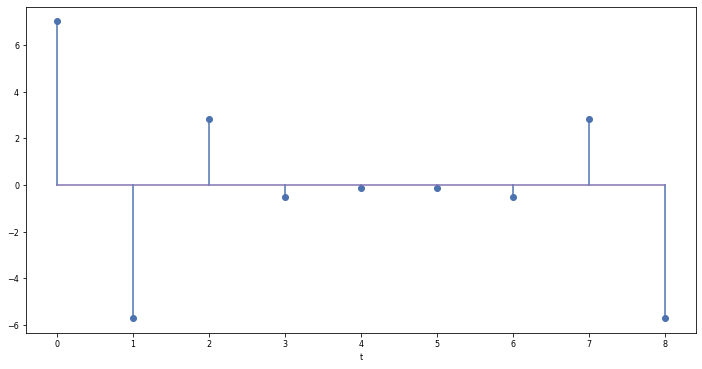

In [32]:
Fs3=36
t3=np.arange(0,1/alpha,1/Fs3)
ya3= alpha*np.cos(2*np.pi*5*alpha*t3)
yb3= (alpha/2)*np.cos(2*np.pi*5*(6*alpha)*t3)
yc3= (alpha/4)*np.cos(2*np.pi*5*(10*alpha)*t3)
ysum3=ya3+yb3+yc3
plt.stem(ysum3)
plt.xlabel("t")

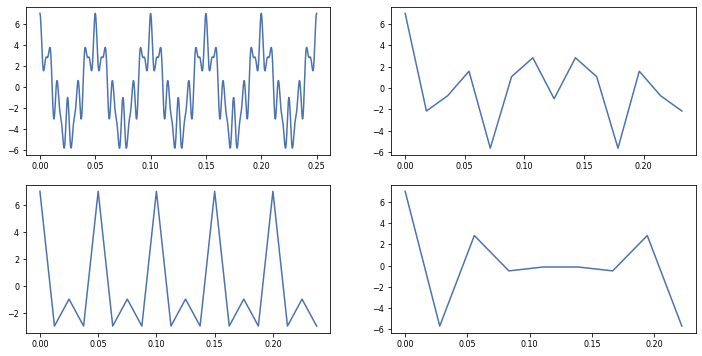

In [33]:
# 4
plt.subplot(221)
plt.plot(t,ysum)
plt.subplot(222)
plt.plot(t1,ysum1)
plt.subplot(223)
plt.plot(t2,ysum2)
plt.subplot(224)
plt.plot(t3,ysum3)

(array([0.01851693, 0.09499133, 0.43535571, 0.47999764, 0.67492007]),
 array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889]),
 <matplotlib.lines.Line2D at 0x20e75abed48>)

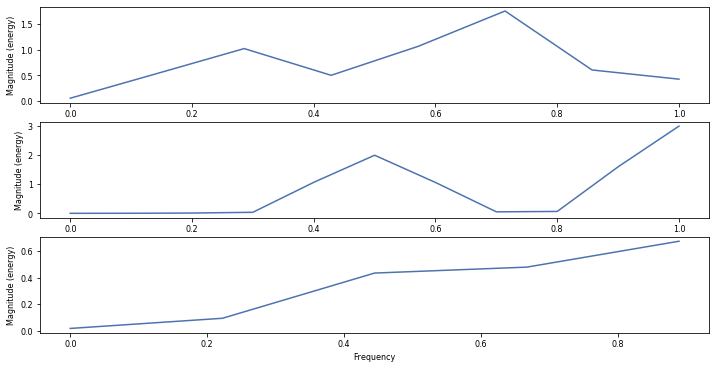

In [34]:
plt.subplot(311)
plt.magnitude_spectrum(ysum1)
plt.subplot(312)
plt.magnitude_spectrum(ysum2)
plt.subplot(313)
plt.magnitude_spectrum(ysum3)

Problem-2

In [35]:
Fss=41400
Fss1=20700
Fss2=10350
t=np.arange(0,1,1/Fss)
do=np.sin(2*np.pi*262*t)
re=np.sin(2*np.pi*294*t)
mi=np.sin(2*np.pi*330*t)
fa=np.sin(2*np.pi*350*t)
so=np.sin(2*np.pi*392*t)
la=np.sin(2*np.pi*440*t)
ti=np.sin(2*np.pi*494*t)
dos=np.sin(2*np.pi*523*t)
fin=np.concatenate([do,re,mi,fa,so,la,ti,dos])
write('dore.wav',Fss,(fin).astype("float32"))
# write('dore1.wav',Fss1,(fin).astype("float32"))
# write('dore2.wav',Fss2,(fin).astype("float32"))

Problem-3

In [36]:
F,x = wavfile.read('Track004.wav')
x_2 = sp.decimate(x, 2)
x_3 = sp.decimate(x, 3)
x_4 = sp.decimate(x, 4)
write('x_2.wav',int(F/2),(x_2).astype("float32"))
write('x_3.wav',int(F/3),(x_3).astype("float32"))
write('x_4.wav',int(F/4),(x_4).astype("float32"))

In [38]:
x_2x =sp.resample(x,F*2)
write('x_2x.wav',int(2*F),(x_2x).astype("float32"))
x_3x =sp.resample(x,F*3)
write('x_3x.wav',int(3*F),(x_3x).astype("float32"))